In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set_context("notebook", font_scale = 1.1)
sns.set_style("ticks")

In [80]:
df = pd.read_csv('data.csv')
df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,CarName
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Mpg             398 non-null float64
Cylinders       406 non-null int64
Displacement    406 non-null float64
Horsepower      400 non-null float64
Weight          406 non-null int64
Acceleration    406 non-null float64
ModelYear       406 non-null int64
Origin          406 non-null int64
CarName         406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


In [82]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())
del df['CarName']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
Mpg             398 non-null float64
Cylinders       406 non-null int64
Displacement    406 non-null float64
Horsepower      406 non-null float64
Weight          406 non-null int64
Acceleration    406 non-null float64
ModelYear       406 non-null int64
Origin          406 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.4 KB


In [83]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 8 columns):
Mpg             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null int64
Acceleration    398 non-null float64
ModelYear       398 non-null int64
Origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 28.0 KB


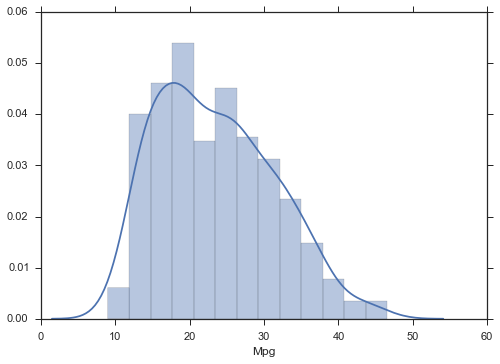

In [84]:
sns.distplot(df['Mpg'])

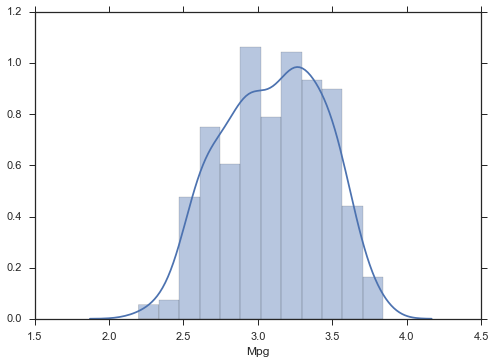

In [106]:
df['Mpg'] = np.log(df['Mpg'])
sns.distplot(df['Mpg'])

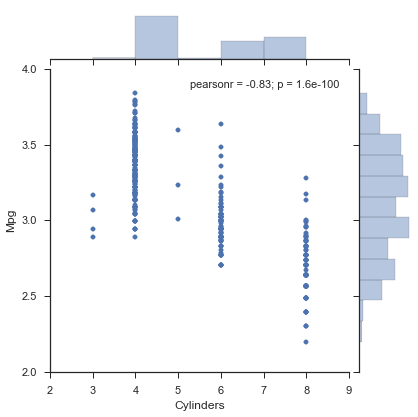

In [107]:
sns.jointplot(x = df.Cylinders, y = df.Mpg)

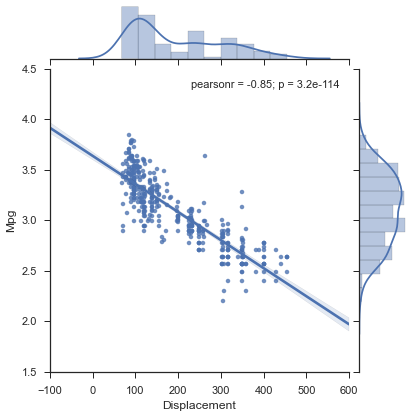

In [108]:
sns.jointplot(x = df.Displacement, y = df.Mpg, kind = "reg")

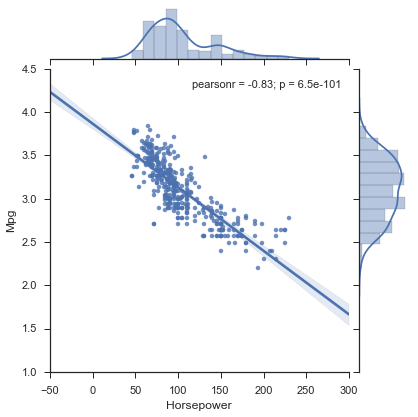

In [109]:
sns.jointplot(x = df.Horsepower, y = df.Mpg, kind = "reg")

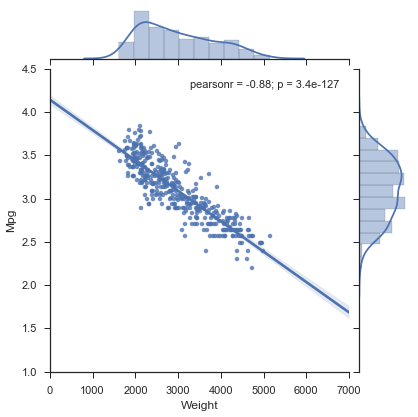

In [110]:
sns.jointplot(x = df.Weight, y = df.Mpg, kind = "reg")

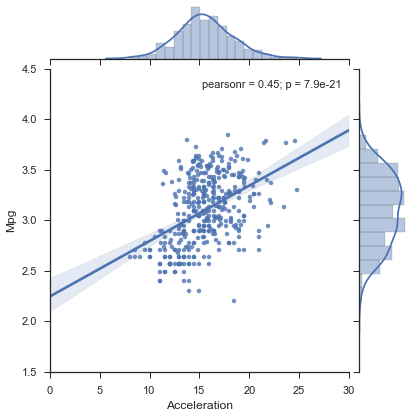

In [111]:
sns.jointplot(x = df.Acceleration, y = df.Mpg, kind = "reg")

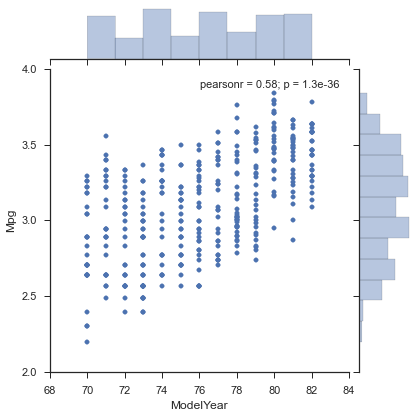

In [112]:
sns.jointplot(x = df.ModelYear, y = df.Mpg)

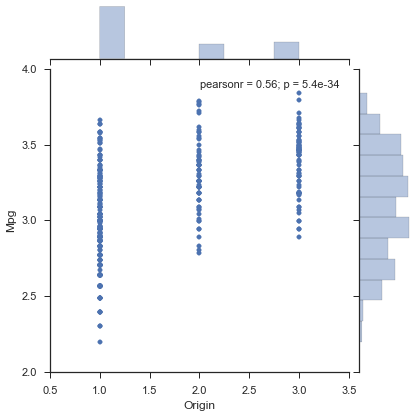

In [113]:
sns.jointplot(x = df.Origin, y = df.Mpg)

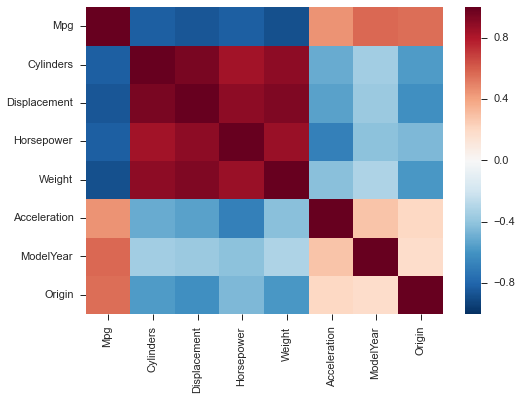

In [114]:
sns.heatmap(df.corr())

In [115]:
X, y = df.drop('Mpg', axis = 1), df['Mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print X_train.shape
print X_test.shape

(298, 7)
(100, 7)


In [116]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.104806174627
